# Initialize

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

fp = 'housing-classification-iter6.csv'
df = pd.read_csv(fp)


# Data Exploration

In [23]:
pd.set_option('display.max_columns', None)
df.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,1057.429452,2.866438,0.613014,2.758904,1.767123,94.244521,15.060959,0.148630,56.897260,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,1.046575,6.517808,1978.506164,472.980137,46.660274,21.954110,3.409589,43.489041,6.321918,2007.815753,730.500000
std,9981.264932,24.284752,438.705324,0.815778,0.644666,40.177307,0.747315,125.338794,55.757415,0.355845,42.300571,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.220338,1.625393,24.689725,213.804841,66.256028,61.119149,29.317331,496.123024,2.703626,1.328095,421.610009
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.000000
25%,7553.500000,59.000000,795.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,365.750000
50%,9478.500000,69.000000,991.500000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,50.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,1.000000,6.000000,1980.000000,480.000000,25.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,730.500000
75%,11601.500000,80.000000,1298.250000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000,0.000000,70.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,1.000000,7.000000,2002.000000,576.000000,68.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1095.250000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,480.000000,1.000000,190.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,3.000000,14.000000,2010.000000,1418.000000,547.000000,552.000000,508.000000,15500.000000,12.000000,2010.000000,1460.000000


In [24]:
pd.set_option('display.max_rows', 80)
df.dtypes

LotArea            int64
LotFrontage      float64
TotalBsmtSF        int64
BedroomAbvGr       int64
Fireplaces         int64
                  ...   
PoolQC            object
Fence             object
MiscFeature       object
SaleType          object
SaleCondition     object
Length: 81, dtype: object

In [25]:
df.sample(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,BsmtFinType2,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1449,1533,21.0,630,1,0,0,0,0,0,0,RM,Norm,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Av,GLQ,Ex,NaN,180,5,7,1970,1970,0.0,553,0,77,630,0,0,630,1,0,1,0,1,3,NaN,0,0,0,0,0,8,2006,1450,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Twnhs,SFoyer,Gable,CompShg,CemntBd,CmentBd,NaN,Unf,Ex,SBrkr,Typ,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Abnorml
402,10200,60.0,672,2,0,0,1,168,0,0,RL,Norm,GasA,Pave,Y,PConc,TA,TA,TA,TA,No,Unf,TA,NaN,30,5,8,1940,1997,0.0,0,0,672,672,0,0,672,0,0,1,0,1,4,1940.0,240,0,0,0,0,8,2008,403,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,Unf,Ex,SBrkr,Typ,Detchd,Unf,TA,TA,N,NaN,GdPrv,NaN,WD,Normal
1039,1477,21.0,630,1,0,0,1,0,0,0,RM,Norm,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Av,GLQ,TA,NaN,180,4,4,1970,1970,0.0,509,0,121,630,0,0,630,1,0,1,0,1,3,1970.0,286,0,0,0,0,4,2009,1040,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,TwnhsE,SFoyer,Gable,CompShg,CemntBd,CmentBd,NaN,Unf,TA,SBrkr,Typ,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1352,6000,50.0,698,2,0,0,2,210,0,0,RM,Norm,GasA,Pave,Y,BrkTil,Gd,TA,TA,TA,No,Unf,TA,NaN,50,6,9,1937,2000,0.0,0,0,698,786,390,0,1176,0,0,1,0,1,4,1999.0,624,0,0,0,0,7,2009,1353,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,NaN,Unf,TA,SBrkr,Typ,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD,Normal
1157,5001,34.0,1314,2,1,0,2,172,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,Gd,120,7,5,2007,2008,166.0,904,0,410,1314,0,0,1314,1,0,2,0,1,6,2008.0,626,62,0,0,0,7,2009,1158,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Twnhs,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Pre-Processing Pipe

In [26]:
from sklearn.model_selection import train_test_split

# X and y creation
y = df.pop("Expensive")

# Feature Engineering
X = df.drop(columns=["LotFrontage"])

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline

X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

# Modelling Pipe - 1

## Decisiontree - Creation

In [27]:
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 0.929804482594182}

## Decisiontree - Analysis

accuracy train:0.9511986301369864
accuracy test:0.9383561643835616
delta:0.012842465753424737


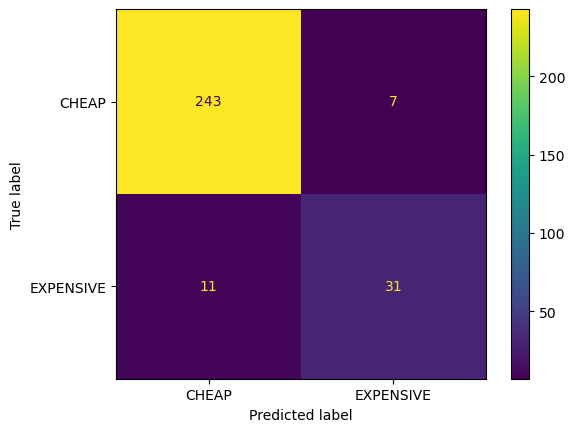

In [28]:
# test accuracy
tr = accuracy_score(search.predict(X_train), y_train)
te = accuracy_score(search.predict(X_test), y_test)
print('accuracy train:'+ str(tr))
print('accuracy test:'+ str(te))
print('delta:'+ str(tr-te))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['CHEAP', 'EXPENSIVE']);


The Model seems lazy , Imbalance check necessary.
It also seems necessary to check if further division of the categorical data improves the model or not

## First Commission Export


In [40]:
# make predictions using the trained DecisionTreeClassifier model
predictions = search.best_estimator_.predict(X_test)

# convert predictions to a pandas dataframe
predictions_df = pd.DataFrame(predictions, columns=['prediction'])

# concatenate the input dataframe with the predictions dataframe
result_df = pd.concat([X_test, predictions_df], axis=1)

# save the concatenated dataframe as a CSV file
result_df.to_csv('commision1_anhe.csv', index=False)

## Miniiteration - Imbalance Check / Fix + Ordinal Check

#### Input

There are several ways to balance an imbalanced dataset in machine learning. Here are some common techniques:

Resampling: You can resample the dataset to create a more balanced distribution of classes. There are two main ways to resample the data: undersampling and oversampling. Undersampling involves removing some of the majority class samples, while oversampling involves creating synthetic samples for the minority class. You can use the RandomUnderSampler and RandomOverSampler classes from the imblearn library in Python to perform undersampling and oversampling, respectively.

Weighted loss functions: You can use weighted loss functions to give more importance to the minority class during training. This can be done by assigning higher weights to the minority class samples in the loss function.
Ensemble methods: You can use ensemble methods to combine multiple models trained on different subsets of the data. This can help to reduce the impact of the class imbalance on the final predictions.

Anomaly detection: You can treat the minority class as an anomaly and use anomaly detection techniques to identify and classify the minority class samples.

Collect more data: You can collect more data for the minority class to balance the dataset. This can be challenging in practice, but it can be effective if done correctly.
It's important to note that each of these techniques has its own advantages and disadvantages, and the best approach will depend on the specific problem and dataset. You may need to experiment with different techniques to find the one that works best for your particular case.

#### Execution

In [ ]:
# maybe defining ordinal & onehot columns
# ordinal_cols = X_cat.columns.get_indexer([""])
# onehot_cols = X_cat.columns.get_indexer([""])
#categorical_pipe = ColumnTransformer(
#    transformers=[
#        ("cat_ordinal", OrdinalEncoder(categories=[cabin_cats]), ordinal_cols),
#        ("cat_onehot", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
#    ]
#)

# Modeling Pipe - 2

In [16]:
# Modeling Pipe - 2

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


full_pipeline = make_pipeline(preprocessor,
                              KNeighborsClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(3, 10, 2)
}

search2 = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search2.fit(X_train, y_train)

scores2 = {"knn" : search.best_score_}

scores2


Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'knn': 0.9101096804959464}